In [48]:
import json
import geopandas as gpd
import glob

## Download Data

Get data from City of Calgary Open Data (https://data.calgary.ca/)

In [49]:
# Tree Canopy

# https://data.calgary.ca/Environment/Tree-Canopy-2020/eymx-4za9/about_data
# https://data.calgary.ca/Environment/Tree-Canopy-2022/mn2n-4z98/about_data
# https://data.calgary.ca/Environment/Tree-Canopy-2012/8efa-as6u/about_data
# https://data.calgary.ca/Environment/Tree-Canopy-2017/immi-c5nn/about_data
# https://data.calgary.ca/Environment/Tree-Canopy-2015/ainq-wn9v/about_data
# https://data.calgary.ca/Environment/Tree-Canopy-2013/g868-hqkz/about_data

# Community Boundary

# https://data.calgary.ca/Base-Maps/Community-Boundaries/ab7m-fwn6

#City Boundary

# https://data.calgary.ca/Base-Maps/City-Boundary/7t9h-2z9s

In [50]:
# Reprojection for equal area

# area_proj = 'EPSG:32611'
area_proj = "EPSG:26911"
# area_proj = "+proj=aea +lat_0=40 +lon_0=-96 +lat_1=50 +lat_2=70 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"
#Using cylindrical equal-area projection
# area_proj = "+proj=cea"

## City Boundary

In [57]:
boundary_data = gpd.read_file("../../data/CityBoundary/geo_export_c4efc033-5793-473f-808e-fa4d31b7e12f.shp")
boundary_data.geometry[0]
boundary_bbox  = boundary_data.bounds.values.tolist()[0]
boundary_data= boundary_data.to_crs("EPSG:4326")

## Community Boundaries

In [52]:
# get data from 

In [53]:
df = gpd.read_file("../../data/Community/geo_export_ce5f3ae5-ca36-4bb9-8c7a-62c336ddb2be.shp")
# df = comm_boundary.to_crs("EPSG:4326").clip(boundary_data.geometry)[['name','geometry','comm_struc']]
# df.head()
df.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

<Axes: >

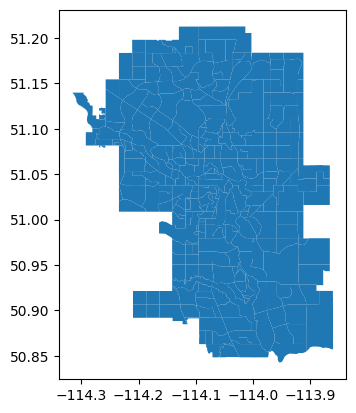

In [54]:
comm_boundary.plot()

## Lidar Data


In [61]:
# Calculate canopy covery for each community boundary, use EPSG 32611 for area

def calc_canopy(x, file):
    # "../../Trees_2022/geo_export_dc81e6e2-f4a7-4c85-8a9c-deabecc1015d.shp",
    df1 = gpd.read_file(
        file,
        mask=x.geometry
    ).clip(x.geometry)

    # df = df.to_crs("EPSG:4326")
    
    df1 = df1.to_crs(area_proj)
    tree_area = df1.area.sum()
    return tree_area/x.geom_reproj.area

In [62]:
shape_files = glob.glob("../../data/shapefile/*/*.shp")

for file in shape_files:
    print(f"Processing {file}")
    
    year = file.split("/")[-2]
    df["geom_reproj"] = df.to_crs(area_proj).geometry
    df["frac"] = df.apply(lambda x: calc_canopy(x,file),axis=1)
    
    # df_filtered = df[df["frac"]<0.9]
    df[["frac","geometry","name"]].to_file(f"canopy_{year}.json", driver="GeoJSON")
    
    print(f"Saved canopy_{year}.json")

Processing ../../data/shapefile/2013/geo_export_6c8f4903-e863-4c30-83f8-05cc2c113ef4.shp
Saved canopy_2013.json
Processing ../../data/shapefile/2022/geo_export_dc81e6e2-f4a7-4c85-8a9c-deabecc1015d.shp
Saved canopy_2022.json
Processing ../../data/shapefile/2015/geo_export_d1d329dd-6318-4402-b939-00176f00cbf6.shp
Saved canopy_2015.json
Processing ../../data/shapefile/2012/geo_export_32026033-41de-4d04-b174-c519430b57c2.shp
Saved canopy_2012.json
Processing ../../data/shapefile/2017/geo_export_36508bd0-d4e3-4351-b62f-73bf78513d75.shp
Saved canopy_2017.json
Processing ../../data/shapefile/2020/geo_export_27c5b67c-4340-4dcf-bd1e-b4fd236cf0dc.shp
Saved canopy_2020.json
